<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cargamos-librerias" data-toc-modified-id="Cargamos-librerias-1">Cargamos librerias</a></span><ul class="toc-item"><li><span><a href="#metricas-de-evaluacion-(sigmas)-+-funciones-de-utilidad" data-toc-modified-id="metricas-de-evaluacion-(sigmas)-+-funciones-de-utilidad-1.1">metricas de evaluacion (sigmas) + funciones de utilidad</a></span></li><li><span><a href="#Datos-de-entrenamiento!" data-toc-modified-id="Datos-de-entrenamiento!-1.2">Datos de entrenamiento!</a></span></li><li><span><a href="#preprocesamiento-para-X-y-Y" data-toc-modified-id="preprocesamiento-para-X-y-Y-1.3">preprocesamiento para X y Y</a></span></li><li><span><a href="#A-empezar-el-ML!" data-toc-modified-id="A-empezar-el-ML!-1.4">A empezar el ML!</a></span><ul class="toc-item"><li><span><a href="#Regression-Logistica" data-toc-modified-id="Regression-Logistica-1.4.1">Regression Logistica</a></span><ul class="toc-item"><li><span><a href="#Coeficientes" data-toc-modified-id="Coeficientes-1.4.1.1">Coeficientes</a></span></li></ul></li></ul></li><li><span><a href="#predecir-probabilidades" data-toc-modified-id="predecir-probabilidades-1.5">predecir probabilidades</a></span></li><li><span><a href="#SGDclassifier-(Regression-Logistica)" data-toc-modified-id="SGDclassifier-(Regression-Logistica)-1.6">SGDclassifier (Regression Logistica)</a></span><ul class="toc-item"><li><span><a href="#Actividad:-Evalua!" data-toc-modified-id="Actividad:-Evalua!-1.6.1">Actividad: Evalua!</a></span></li></ul></li><li><span><a href="#Regularizacion" data-toc-modified-id="Regularizacion-1.7">Regularizacion</a></span></li></ul></li></ul></div>

# Cargamos librerias

In [41]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import scipy as sc
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
import sys

## metricas de evaluacion (sigmas) + funciones de utilidad

![http://i.imgur.com/Hflz2lG.jpg](http://i.imgur.com/Hflz2lG.jpg)

In [75]:
from sklearn.metrics import roc_curve, auc

    
def AMSScore(s,b): 
    return np.sqrt (2.*( (s + b + 10.)*np.log(1.+s/(b+10.))-s))

def eval_model(Y_true_train,Y_pred_train,w_train,Y_true_test,Y_pred_test,w_test):
    ratio =  float(len(X_train)) /float(len(X_test))
    TruePositive_train = w_train*(Y_true_train==1.0)*(1.0/ratio)
    TrueNegative_train = w_train*(Y_true_train==0.0)*(1.0/ratio)
    TruePositive_valid = w_test*(Y_true_test==1.0)*(1.0/(1-ratio))
    TrueNegative_valid = w_test*(Y_true_test==0.0)*(1.0/(1-ratio))
    s_train = sum ( TruePositive_train*(Y_pred_train==1.0) )
    b_train = sum ( TrueNegative_train*(Y_pred_train==1.0) )
    s_test = sum ( TruePositive_valid*(Y_pred_test==1.0) )
    b_test = sum ( TrueNegative_valid*(Y_pred_test==1.0) )
    score_train = AMSScore(s_train,b_train)
    score_test = AMSScore(s_test,b_test)
    print('--- Resultados --')
    print('- AUC train: {:.3f} '.format(sk.metrics.roc_auc_score(Y_train,Y_train_pred)))
    print('- AUC test : {:.3f} '.format(sk.metrics.roc_auc_score(Y_test,Y_test_pred)))
    print('- AMS train: {:.3f} sigma'.format(score_train))
    print('- AMS test : {:.3f} sigma'.format(score_test))
    return score_train, score_test

def plot_roc(clf,Y_test,Y_test_prob):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=str(clf.__class__.__name__))
    plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), lw=2, alpha=0.3, label='Suerte')
    plt.legend(loc='lower right')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.tight_layout()
    return

## Datos de entrenamiento!

Quieres saber mas? Visita [http://higgsml.lal.in2p3.fr/documentation](http://higgsml.lal.in2p3.fr/documentation)

In [ ]:
!wget

In [132]:
df=pd.read_csv('datos/training.csv')
print(df.shape)
df.head(1)

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.002653,s


## preprocesamiento para X y Y

In [77]:
Y = df['Label'].replace(to_replace=['s','b'],value=[1,0]).values
weights = df['Weight'].values
X = df.drop(['EventId','Label','Weight'],axis=1).values

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test,w_train,w_test = train_test_split(X,Y,weights,train_size=0.3)
print(X_train.shape,Y_train.shape,w_train.shape)
print(X_test.shape,Y_test.shape,w_test.shape)

(75000, 30) (75000,) (75000,)
(175000, 30) (175000,) (175000,)


/home/beangoben/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## A empezar el ML!

### Regression Logistica

** Modelo :** $h_{\theta}(x) = g(\theta^{T}x) = g(\sum \theta_i x_i +b)$ con $g(z)=\frac{1}{1+e^{-z}}$

** optimizador, metrica?**

In [79]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(verbose=1)
clf.fit(X_train,Y_train) 

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

#### Coeficientes

$$\sum \theta_i x_i + b $$

a = [[ 5.51468680e-04 -1.87375994e-02 -2.57792255e-02  3.90828869e-03
  -2.35182375e-01  2.71288512e-03 -4.66821090e-02  1.28825615e+00
   2.52214189e-05  1.69248169e-02 -9.90470909e-01  1.88501110e-01
   3.30947439e-01  3.79873263e-03 -4.65111087e-03  2.79328483e-03
   3.14156238e-02  8.77541757e-03  1.23465303e-03  7.27853815e-03
   1.00102128e-03 -1.43237263e-03 -7.91799902e-01 -3.95096894e-03
   3.57581848e-03  1.61416840e-03 -6.89383011e-03 -2.21908325e-02
  -2.14436911e-02 -1.80079359e-02]]
b = [-0.37875609]


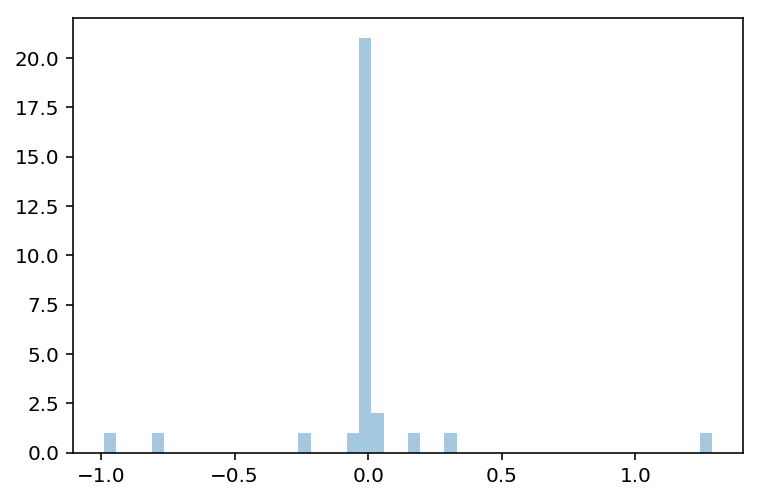

In [81]:
print('a = {}'.format(clf.coef_))
print('b = {}'.format(clf.intercept_))
sns.distplot(clf.coef_,kde=False)
plt.show()

## predecir probabilidades

In [82]:
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
Y_train_prob=clf.predict_proba(X_train)[:,1]
Y_test_prob =clf.predict_proba(X_test)[:,1]
print('AUC:')
print('train: {:2.4f}'.format(sk.metrics.roc_auc_score(Y_train,Y_train_pred)))
print('test:  {:2.4f}'.format(sk.metrics.roc_auc_score(Y_test,Y_test_pred)))
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

AUC:
train: 0.7002
test:  0.6994
--- Resultados --
- AUC train: 0.700 
- AUC test : 0.699 
- AMS train: 1.658 sigma
- AMS test : 2.226 sigma


(1.6577281228043583, 2.2259140008074416)

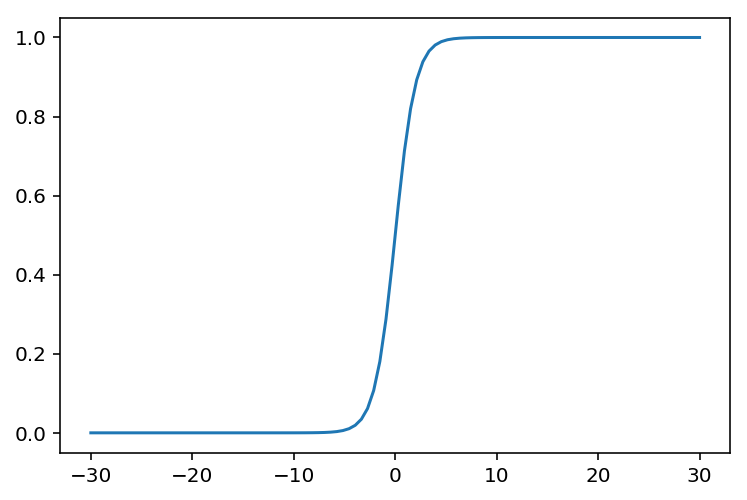

In [99]:
x = np.linspace(-30,30,100)
plt.plot(x,1.0/(1+np.exp(-x)))
plt.show()

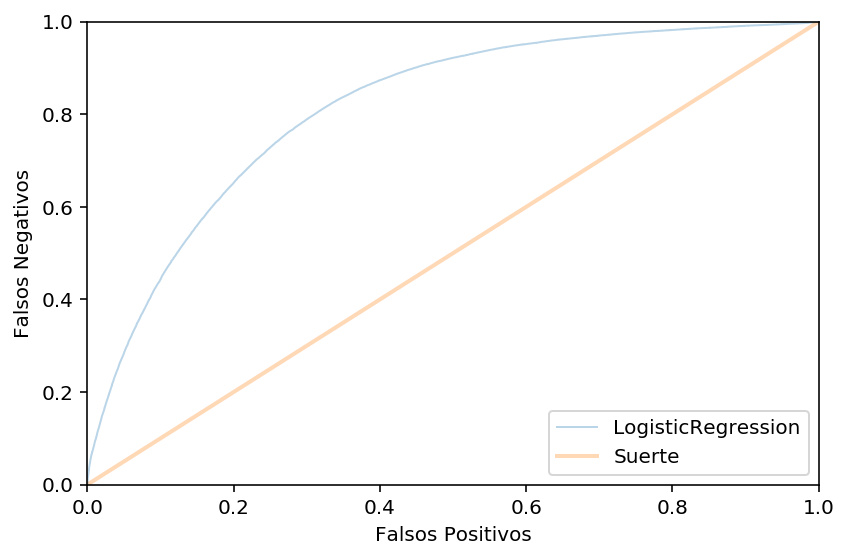

In [83]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label=str(clf.__class__.__name__))
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), lw=2, alpha=0.3, label='Suerte')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Falsos Positivos')
plt.ylabel('Falsos Negativos')
plt.tight_layout()
plt.show()

## SGDclassifier (Regression Logistica)

** Modelo :** $h_{\theta}(x) = g(\theta^{T}x)$ con $g(z)=\frac{1}{1+e^{-z}}$

** Costo :** $$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$$
** Optimizador:** Descenso de gradient


Ojo, la derivada del costo es:
$$ \frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i$$

In [92]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log',verbose=1,max_iter=500)
clf.fit(X_train,Y_train)

<class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>
-- Epoch 1
Norm: 7310.76, NNZs: 30, Bias: -156.246707, T: 75000, Avg. loss: 690732.798023
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 4321.43, NNZs: 30, Bias: -164.714816, T: 150000, Avg. loss: 105668.996617
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 3106.18, NNZs: 30, Bias: -176.072233, T: 225000, Avg. loss: 61880.959627
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 2013.13, NNZs: 30, Bias: -181.939898, T: 300000, Avg. loss: 43394.790695
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1890.10, NNZs: 30, Bias: -185.950223, T: 375000, Avg. loss: 34046.914948
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1685.44, NNZs: 30, Bias: -188.743790, T: 450000, Avg. loss: 27827.640425
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 1518.53, NNZs: 30, Bias: -192.698782, T: 525000, Avg. loss: 23351.834177
Total training time: 0.14 seconds.
-- Epoch 8
Norm: 1277.67, NNZs: 30, Bias: -195.229625, T: 6

Norm: 432.28, NNZs: 30, Bias: -245.110456, T: 5475000, Avg. loss: 2094.471236
Total training time: 1.47 seconds.
-- Epoch 74
Norm: 429.80, NNZs: 30, Bias: -245.416054, T: 5550000, Avg. loss: 2046.190235
Total training time: 1.49 seconds.
-- Epoch 75
Norm: 426.99, NNZs: 30, Bias: -245.701587, T: 5625000, Avg. loss: 2027.059903
Total training time: 1.51 seconds.
-- Epoch 76
Norm: 427.01, NNZs: 30, Bias: -246.063136, T: 5700000, Avg. loss: 2000.159430
Total training time: 1.53 seconds.
-- Epoch 77
Norm: 425.36, NNZs: 30, Bias: -246.465399, T: 5775000, Avg. loss: 2003.268795
Total training time: 1.55 seconds.
-- Epoch 78
Norm: 424.80, NNZs: 30, Bias: -246.761784, T: 5850000, Avg. loss: 1946.930953
Total training time: 1.57 seconds.
-- Epoch 79
Norm: 424.94, NNZs: 30, Bias: -247.036236, T: 5925000, Avg. loss: 1918.782267
Total training time: 1.59 seconds.
-- Epoch 80
Norm: 419.33, NNZs: 30, Bias: -247.444317, T: 6000000, Avg. loss: 1914.820240
Total training time: 1.61 seconds.
-- Epoch 81


Norm: 372.02, NNZs: 30, Bias: -261.100678, T: 10875000, Avg. loss: 1041.982121
Total training time: 2.95 seconds.
-- Epoch 146
Norm: 372.40, NNZs: 30, Bias: -261.245790, T: 10950000, Avg. loss: 1032.051818
Total training time: 2.97 seconds.
-- Epoch 147
Norm: 371.04, NNZs: 30, Bias: -261.421831, T: 11025000, Avg. loss: 1028.515240
Total training time: 3.00 seconds.
-- Epoch 148
Norm: 370.56, NNZs: 30, Bias: -261.596968, T: 11100000, Avg. loss: 1019.294987
Total training time: 3.02 seconds.
-- Epoch 149
Norm: 371.07, NNZs: 30, Bias: -261.769271, T: 11175000, Avg. loss: 1011.557929
Total training time: 3.05 seconds.
-- Epoch 150
Norm: 370.01, NNZs: 30, Bias: -261.967962, T: 11250000, Avg. loss: 1002.280268
Total training time: 3.07 seconds.
-- Epoch 151
Norm: 368.81, NNZs: 30, Bias: -262.106765, T: 11325000, Avg. loss: 999.944898
Total training time: 3.10 seconds.
-- Epoch 152
Norm: 368.69, NNZs: 30, Bias: -262.236698, T: 11400000, Avg. loss: 997.534619
Total training time: 3.12 seconds.

Norm: 337.39, NNZs: 30, Bias: -269.445179, T: 15975000, Avg. loss: 704.932719
Total training time: 4.44 seconds.
-- Epoch 214
Norm: 337.15, NNZs: 30, Bias: -269.538911, T: 16050000, Avg. loss: 701.422866
Total training time: 4.46 seconds.
-- Epoch 215
Norm: 336.85, NNZs: 30, Bias: -269.630730, T: 16125000, Avg. loss: 698.722830
Total training time: 4.48 seconds.
-- Epoch 216
Norm: 336.50, NNZs: 30, Bias: -269.721503, T: 16200000, Avg. loss: 695.702157
Total training time: 4.50 seconds.
-- Epoch 217
Norm: 336.02, NNZs: 30, Bias: -269.835430, T: 16275000, Avg. loss: 691.809194
Total training time: 4.53 seconds.
-- Epoch 218
Norm: 335.46, NNZs: 30, Bias: -269.913278, T: 16350000, Avg. loss: 687.385644
Total training time: 4.55 seconds.
-- Epoch 219
Norm: 335.02, NNZs: 30, Bias: -270.008107, T: 16425000, Avg. loss: 684.712991
Total training time: 4.57 seconds.
-- Epoch 220
Norm: 335.01, NNZs: 30, Bias: -270.102568, T: 16500000, Avg. loss: 683.381906
Total training time: 4.59 seconds.
-- Ep

Norm: 308.08, NNZs: 30, Bias: -275.404208, T: 21450000, Avg. loss: 519.479317
Total training time: 6.15 seconds.
-- Epoch 287
Norm: 307.70, NNZs: 30, Bias: -275.464248, T: 21525000, Avg. loss: 518.215347
Total training time: 6.18 seconds.
-- Epoch 288
Norm: 307.78, NNZs: 30, Bias: -275.543021, T: 21600000, Avg. loss: 514.189838
Total training time: 6.20 seconds.
-- Epoch 289
Norm: 307.37, NNZs: 30, Bias: -275.587583, T: 21675000, Avg. loss: 517.004448
Total training time: 6.23 seconds.
-- Epoch 290
Norm: 307.06, NNZs: 30, Bias: -275.644083, T: 21750000, Avg. loss: 516.741635
Total training time: 6.26 seconds.
-- Epoch 291
Norm: 306.72, NNZs: 30, Bias: -275.731007, T: 21825000, Avg. loss: 511.811312
Total training time: 6.28 seconds.
-- Epoch 292
Norm: 306.51, NNZs: 30, Bias: -275.779385, T: 21900000, Avg. loss: 510.611263
Total training time: 6.31 seconds.
-- Epoch 293
Norm: 306.15, NNZs: 30, Bias: -275.838791, T: 21975000, Avg. loss: 509.816698
Total training time: 6.33 seconds.
-- Ep

Norm: 288.00, NNZs: 30, Bias: -279.161047, T: 26925000, Avg. loss: 416.122158
Total training time: 7.87 seconds.
-- Epoch 360
Norm: 287.65, NNZs: 30, Bias: -279.201456, T: 27000000, Avg. loss: 412.901752
Total training time: 7.89 seconds.
-- Epoch 361
Norm: 287.60, NNZs: 30, Bias: -279.239390, T: 27075000, Avg. loss: 414.343972
Total training time: 7.91 seconds.
-- Epoch 362
Norm: 287.32, NNZs: 30, Bias: -279.279830, T: 27150000, Avg. loss: 410.257137
Total training time: 7.93 seconds.
-- Epoch 363
Norm: 287.00, NNZs: 30, Bias: -279.319251, T: 27225000, Avg. loss: 409.045873
Total training time: 7.95 seconds.
-- Epoch 364
Norm: 286.81, NNZs: 30, Bias: -279.358936, T: 27300000, Avg. loss: 408.763047
Total training time: 7.98 seconds.
-- Epoch 365
Norm: 286.58, NNZs: 30, Bias: -279.417010, T: 27375000, Avg. loss: 408.196486
Total training time: 8.00 seconds.
-- Epoch 366
Norm: 286.35, NNZs: 30, Bias: -279.461166, T: 27450000, Avg. loss: 404.896688
Total training time: 8.02 seconds.
-- Ep

Norm: 270.69, NNZs: 30, Bias: -281.632698, T: 32475000, Avg. loss: 344.033166
Total training time: 9.55 seconds.
-- Epoch 434
Norm: 270.56, NNZs: 30, Bias: -281.651534, T: 32550000, Avg. loss: 340.970203
Total training time: 9.57 seconds.
-- Epoch 435
Norm: 270.19, NNZs: 30, Bias: -281.675885, T: 32625000, Avg. loss: 341.901184
Total training time: 9.59 seconds.
-- Epoch 436
Norm: 270.07, NNZs: 30, Bias: -281.699461, T: 32700000, Avg. loss: 340.286906
Total training time: 9.62 seconds.
-- Epoch 437
Norm: 269.87, NNZs: 30, Bias: -281.721382, T: 32775000, Avg. loss: 339.811408
Total training time: 9.64 seconds.
-- Epoch 438
Norm: 269.65, NNZs: 30, Bias: -281.761643, T: 32850000, Avg. loss: 338.370018
Total training time: 9.66 seconds.
-- Epoch 439
Norm: 269.45, NNZs: 30, Bias: -281.781931, T: 32925000, Avg. loss: 337.362599
Total training time: 9.68 seconds.
-- Epoch 440
Norm: 269.26, NNZs: 30, Bias: -281.805368, T: 33000000, Avg. loss: 333.804666
Total training time: 9.71 seconds.
-- Ep

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=500, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

### Actividad: Evalua!

## Regularizacion




** Costo :** $$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$$

** $L2$**: $$ +  \alpha \sum \theta_i^2$$
** $L1$**: $$ +  \frac{\lambda}{1}\sum |\theta_i|$$


In [100]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log',alpha=0.5,l1_ratio=0.2,verbose=1,max_iter=500)
clf.fit(X_train,Y_train)

-- Epoch 1
Norm: 1.41, NNZs: 30, Bias: 0.005986, T: 75000, Avg. loss: 298.116523
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.82, NNZs: 30, Bias: 0.004030, T: 150000, Avg. loss: 20.961149
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 30, Bias: 0.002571, T: 225000, Avg. loss: 12.186038
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 30, Bias: 0.001792, T: 300000, Avg. loss: 8.589940
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 0.39, NNZs: 30, Bias: 0.001135, T: 375000, Avg. loss: 6.708786
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 30, Bias: 0.000307, T: 450000, Avg. loss: 5.428942
Total training time: 0.16 seconds.
-- Epoch 7
Norm: 0.30, NNZs: 30, Bias: -0.000319, T: 525000, Avg. loss: 4.637908
Total training time: 0.19 seconds.
-- Epoch 8
Norm: 0.27, NNZs: 30, Bias: -0.000904, T: 600000, Avg. loss: 3.988753
Total training time: 0.21 seconds.
-- Epoch 9
Norm: 0.25, NNZs: 30, Bias: -0.001332, T: 675000, Avg. loss: 3.5

Norm: 0.10, NNZs: 30, Bias: -0.011773, T: 5625000, Avg. loss: 0.661053
Total training time: 2.17 seconds.
-- Epoch 76
Norm: 0.10, NNZs: 30, Bias: -0.011848, T: 5700000, Avg. loss: 0.657594
Total training time: 2.20 seconds.
-- Epoch 77
Norm: 0.10, NNZs: 30, Bias: -0.011928, T: 5775000, Avg. loss: 0.656272
Total training time: 2.22 seconds.
-- Epoch 78
Norm: 0.10, NNZs: 30, Bias: -0.012002, T: 5850000, Avg. loss: 0.656408
Total training time: 2.25 seconds.
-- Epoch 79
Norm: 0.10, NNZs: 30, Bias: -0.012077, T: 5925000, Avg. loss: 0.651473
Total training time: 2.28 seconds.
-- Epoch 80
Norm: 0.10, NNZs: 30, Bias: -0.012155, T: 6000000, Avg. loss: 0.649490
Total training time: 2.31 seconds.
-- Epoch 81
Norm: 0.10, NNZs: 30, Bias: -0.012230, T: 6075000, Avg. loss: 0.644789
Total training time: 2.34 seconds.
-- Epoch 82
Norm: 0.10, NNZs: 30, Bias: -0.012305, T: 6150000, Avg. loss: 0.644189
Total training time: 2.36 seconds.
-- Epoch 83
Norm: 0.10, NNZs: 30, Bias: -0.012376, T: 6225000, Avg. 

Norm: 0.09, NNZs: 30, Bias: -0.015973, T: 11250000, Avg. loss: 0.575052
Total training time: 4.35 seconds.
-- Epoch 151
Norm: 0.09, NNZs: 30, Bias: -0.016014, T: 11325000, Avg. loss: 0.575017
Total training time: 4.38 seconds.
-- Epoch 152
Norm: 0.09, NNZs: 30, Bias: -0.016054, T: 11400000, Avg. loss: 0.574487
Total training time: 4.41 seconds.
-- Epoch 153
Norm: 0.09, NNZs: 30, Bias: -0.016092, T: 11475000, Avg. loss: 0.576118
Total training time: 4.44 seconds.
-- Epoch 154
Norm: 0.09, NNZs: 30, Bias: -0.016132, T: 11550000, Avg. loss: 0.574711
Total training time: 4.47 seconds.
-- Epoch 155
Norm: 0.09, NNZs: 30, Bias: -0.016172, T: 11625000, Avg. loss: 0.574947
Total training time: 4.51 seconds.
-- Epoch 156
Norm: 0.09, NNZs: 30, Bias: -0.016213, T: 11700000, Avg. loss: 0.572876
Total training time: 4.54 seconds.
-- Epoch 157
Norm: 0.09, NNZs: 30, Bias: -0.016252, T: 11775000, Avg. loss: 0.573075
Total training time: 4.57 seconds.
-- Epoch 158
Norm: 0.09, NNZs: 30, Bias: -0.016290, T

Norm: 0.09, NNZs: 30, Bias: -0.018303, T: 16425000, Avg. loss: 0.555454
Total training time: 6.34 seconds.
-- Epoch 220
Norm: 0.09, NNZs: 30, Bias: -0.018332, T: 16500000, Avg. loss: 0.556228
Total training time: 6.37 seconds.
-- Epoch 221
Norm: 0.09, NNZs: 30, Bias: -0.018360, T: 16575000, Avg. loss: 0.555220
Total training time: 6.40 seconds.
-- Epoch 222
Norm: 0.09, NNZs: 30, Bias: -0.018389, T: 16650000, Avg. loss: 0.555249
Total training time: 6.43 seconds.
-- Epoch 223
Norm: 0.09, NNZs: 30, Bias: -0.018417, T: 16725000, Avg. loss: 0.555110
Total training time: 6.46 seconds.
-- Epoch 224
Norm: 0.09, NNZs: 30, Bias: -0.018443, T: 16800000, Avg. loss: 0.555007
Total training time: 6.49 seconds.
-- Epoch 225
Norm: 0.09, NNZs: 30, Bias: -0.018472, T: 16875000, Avg. loss: 0.555652
Total training time: 6.51 seconds.
-- Epoch 226
Norm: 0.09, NNZs: 30, Bias: -0.018501, T: 16950000, Avg. loss: 0.554982
Total training time: 6.54 seconds.
-- Epoch 227
Norm: 0.09, NNZs: 30, Bias: -0.018528, T

Norm: 0.09, NNZs: 30, Bias: -0.020153, T: 22125000, Avg. loss: 0.545040
Total training time: 8.56 seconds.
-- Epoch 296
Norm: 0.09, NNZs: 30, Bias: -0.020174, T: 22200000, Avg. loss: 0.545324
Total training time: 8.59 seconds.
-- Epoch 297
Norm: 0.09, NNZs: 30, Bias: -0.020194, T: 22275000, Avg. loss: 0.545535
Total training time: 8.62 seconds.
-- Epoch 298
Norm: 0.09, NNZs: 30, Bias: -0.020215, T: 22350000, Avg. loss: 0.544326
Total training time: 8.65 seconds.
-- Epoch 299
Norm: 0.09, NNZs: 30, Bias: -0.020237, T: 22425000, Avg. loss: 0.544847
Total training time: 8.68 seconds.
-- Epoch 300
Norm: 0.09, NNZs: 30, Bias: -0.020258, T: 22500000, Avg. loss: 0.544766
Total training time: 8.70 seconds.
-- Epoch 301
Norm: 0.09, NNZs: 30, Bias: -0.020279, T: 22575000, Avg. loss: 0.544881
Total training time: 8.73 seconds.
-- Epoch 302
Norm: 0.09, NNZs: 30, Bias: -0.020301, T: 22650000, Avg. loss: 0.544144
Total training time: 8.76 seconds.
-- Epoch 303
Norm: 0.09, NNZs: 30, Bias: -0.020321, T

Norm: 0.09, NNZs: 30, Bias: -0.021560, T: 27750000, Avg. loss: 0.539560
Total training time: 10.74 seconds.
-- Epoch 371
Norm: 0.09, NNZs: 30, Bias: -0.021576, T: 27825000, Avg. loss: 0.539252
Total training time: 10.77 seconds.
-- Epoch 372
Norm: 0.09, NNZs: 30, Bias: -0.021593, T: 27900000, Avg. loss: 0.540119
Total training time: 10.80 seconds.
-- Epoch 373
Norm: 0.09, NNZs: 30, Bias: -0.021610, T: 27975000, Avg. loss: 0.539634
Total training time: 10.83 seconds.
-- Epoch 374
Norm: 0.09, NNZs: 30, Bias: -0.021626, T: 28050000, Avg. loss: 0.539370
Total training time: 10.86 seconds.
-- Epoch 375
Norm: 0.09, NNZs: 30, Bias: -0.021643, T: 28125000, Avg. loss: 0.538700
Total training time: 10.89 seconds.
-- Epoch 376
Norm: 0.09, NNZs: 30, Bias: -0.021659, T: 28200000, Avg. loss: 0.539449
Total training time: 10.92 seconds.
-- Epoch 377
Norm: 0.09, NNZs: 30, Bias: -0.021676, T: 28275000, Avg. loss: 0.539259
Total training time: 10.95 seconds.
-- Epoch 378
Norm: 0.09, NNZs: 30, Bias: -0.0

Norm: 0.09, NNZs: 30, Bias: -0.022703, T: 33375000, Avg. loss: 0.535951
Total training time: 12.93 seconds.
-- Epoch 446
Norm: 0.09, NNZs: 30, Bias: -0.022716, T: 33450000, Avg. loss: 0.536150
Total training time: 12.96 seconds.
-- Epoch 447
Norm: 0.09, NNZs: 30, Bias: -0.022730, T: 33525000, Avg. loss: 0.535592
Total training time: 12.99 seconds.
-- Epoch 448
Norm: 0.09, NNZs: 30, Bias: -0.022745, T: 33600000, Avg. loss: 0.536026
Total training time: 13.02 seconds.
-- Epoch 449
Norm: 0.09, NNZs: 30, Bias: -0.022758, T: 33675000, Avg. loss: 0.535632
Total training time: 13.05 seconds.
-- Epoch 450
Norm: 0.09, NNZs: 30, Bias: -0.022772, T: 33750000, Avg. loss: 0.535930
Total training time: 13.08 seconds.
-- Epoch 451
Norm: 0.09, NNZs: 30, Bias: -0.022786, T: 33825000, Avg. loss: 0.536228
Total training time: 13.11 seconds.
-- Epoch 452
Norm: 0.09, NNZs: 30, Bias: -0.022799, T: 33900000, Avg. loss: 0.535922
Total training time: 13.14 seconds.
-- Epoch 453
Norm: 0.09, NNZs: 30, Bias: -0.0

SGDClassifier(alpha=0.5, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.2, learning_rate='optimal',
       loss='log', max_iter=500, n_iter=None, n_jobs=1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None, verbose=1,
       warm_start=False)